In [2]:
import numpy as np
from numpy.fft import fft, rfft
from numpy.linalg import norm
from matplotlib import pyplot as plt

In [3]:
def f(n):
    k=0
    while True:
        k=k+1
        if n**k%21==1:
            return k
            k=1
            break
f(20)           

2

In [4]:
a=[2,5,8,10,11,13,17,19]# упражнение 3
for i in a:
    print(str(i**(f(i)/2)-1),'\t',str((i**(f(i)/2)-1)%21==0),'\t',str(i**(f(i)/2)+1),'\t',str((i**(f(i)/2)+1)%21==0))

7.0 	 False 	 9.0 	 False
124.0 	 False 	 126.0 	 True
7.0 	 False 	 9.0 	 False
999.0 	 False 	 1001.0 	 False
1330.0 	 False 	 1332.0 	 False
12.0 	 False 	 14.0 	 False
4912.0 	 False 	 4914.0 	 True
6858.0 	 False 	 6860.0 	 False


In [5]:
b=[2,8,10,11,13,19]# отсеянные числа после 3-го упр
b_plus=[0 for i in range(len(b))]
b_minus=[0 for i in range(len(b))]
k=0
for i in b:
    b_plus[k]=i**(f(i)/2)+1
    b_minus[k]=i**(f(i)/2)-1
    k+=1
print(b_plus)    
    

[9.0, 9.0, 1001.0, 1332.0, 14.0, 6860.0]


In [6]:
#алгоритм Евклида для нахождения gcd
def gcd(a,b):
    if b>a:
        a,b=b,a
    while b!=0:
        a,b=b,a%b
    return a

In [7]:
#упражнение 4
N=21
for i in range(len(b)):
    print('x:',str(b[i]),'\t','gcd(N,x^s/2-1):',str(gcd(N,b_minus[i])),'\t','gcd(N,x^s/2+1):',str(gcd(N,b_plus[i])))

x: 2 	 gcd(N,x^s/2-1): 7.0 	 gcd(N,x^s/2+1): 3.0
x: 8 	 gcd(N,x^s/2-1): 7.0 	 gcd(N,x^s/2+1): 3.0
x: 10 	 gcd(N,x^s/2-1): 3.0 	 gcd(N,x^s/2+1): 7.0
x: 11 	 gcd(N,x^s/2-1): 7.0 	 gcd(N,x^s/2+1): 3.0
x: 13 	 gcd(N,x^s/2-1): 3.0 	 gcd(N,x^s/2+1): 7.0
x: 19 	 gcd(N,x^s/2-1): 3.0 	 gcd(N,x^s/2+1): 7.0


In [8]:
# упражнение 5 для x=2
Q=512
s=6
def pmN(x,r):# возведение в степень по модулю
    return (x**r)%21
n=2
for i in range(13):
    print('|'+str(i)+'>''|'+str(pmN(n,i))+'>',end='+')
    if i%6==5:
        print()
print('...')

|0>|1>+|1>|2>+|2>|4>+|3>|8>+|4>|16>+|5>|11>+
|6>|1>+|7>|2>+|8>|4>+|9>|8>+|10>|16>+|11>|11>+
|12>|1>+...


In [9]:
# упражнение 6 для x=2
f_r_possible=[1,2,4,8,16,11]
for f_r in f_r_possible:
    print('if f(r)='+str(f_r)+'\t|ψ>=',end='')
    for i in range(50):
        if pmN(n,i)==f_r:
            print('|'+str(i)+'>',end='+')
    print('...')    

if f(r)=1	|ψ>=|0>+|6>+|12>+|18>+|24>+|30>+|36>+|42>+|48>+...
if f(r)=2	|ψ>=|1>+|7>+|13>+|19>+|25>+|31>+|37>+|43>+|49>+...
if f(r)=4	|ψ>=|2>+|8>+|14>+|20>+|26>+|32>+|38>+|44>+...
if f(r)=8	|ψ>=|3>+|9>+|15>+|21>+|27>+|33>+|39>+|45>+...
if f(r)=16	|ψ>=|4>+|10>+|16>+|22>+|28>+|34>+|40>+|46>+...
if f(r)=11	|ψ>=|5>+|11>+|17>+|23>+|29>+|35>+|41>+|47>+...


P(|y>)=0.11417182031964809;	P(|z>)=1.3829134316605312e-05


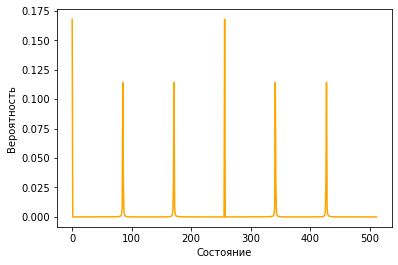

In [10]:
# упражнение 7 для x=2
Q=512
s=6
y=int(Q/s//1) #85
z=34
f_r=1
L=np.array([i for i in range(512)])
state=[]
for i in range(Q):
    if pmN(n,i)==f_r:
        state+=[1]
    else:
        state+=[0]
state=np.array(state)
state=state/norm(state)# нормировка
state_fft=fft(state, norm='ortho') #взяли фурье
P=abs(state_fft)**2
plt.plot(L[:], P[:],'-', color='orange')
plt.ylabel('Вероятность')
plt.xlabel('Состояние')
print('P(|y>)='+str(P[y])+';\tP(|z>)='+str(P[z]))

In [11]:
#упражнение 8 для x=2 в листочке
